In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date
import numpy as np
import seaborn as sns

sns.set()
%matplotlib inline

In [2]:
def loadPrices(fileName):
    dat = pd.read_csv(fileName, index_col=0)
    dat.index = pd.DatetimeIndex(dat.index)
    # dat['dat_int'] = np.array(list(range(1, len(dat) + 1))) / 10
    return dat

In [3]:
def normalizeValues(table, newColumn, existingColum):
    priceAtT0 = table.iloc[0][existingColum]
    table[newColumn] = table.apply(lambda row: (row[existingColum] / priceAtT0), axis=1)
    return table

In [13]:
path_csv_BYN = "byn/USDBYN2010_2020.csv"

usdByn = loadPrices(path_csv_BYN)
usdByn = normalizeValues(usdByn, 'procent', 'price')

In [14]:
Xaxis = usdByn.index
Yaxis = usdByn['procent'].values

Y_max = usdByn[usdByn['procent'] == usdByn['procent'].max()]

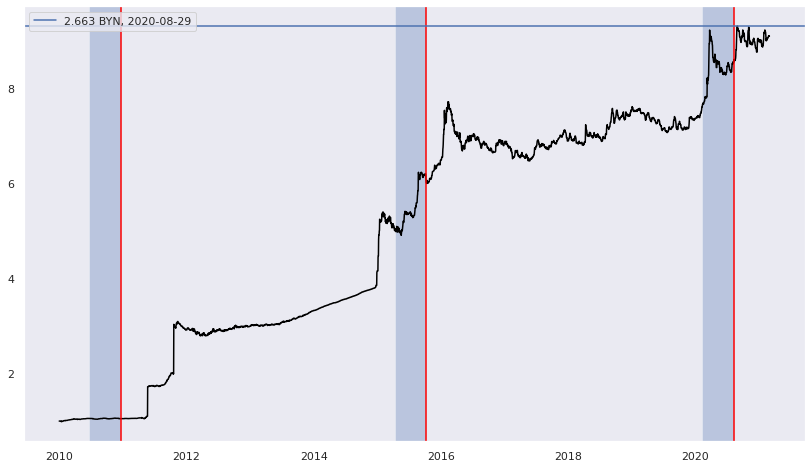

In [17]:
plt.figure(figsize=(14, 8))
plt.plot(Xaxis, Yaxis, 'black')
plt.axvline(date(2010, 12, 19), c='red')
plt.axvspan(date(2010, 6, 19), date(2010, 12, 19), alpha=0.3)
plt.axvline(date(2015, 10, 11), c='red')
plt.axvspan(date(2015, 4, 11), date(2015, 10, 11), alpha=0.3)
plt.axvline(date(2020, 8, 9), c='red')
plt.axvspan(date(2020, 2, 9), date(2020, 8, 9), alpha=0.3)
max_price = usdByn.loc[Y_max.index[0]]
plt.axhline(max_price['procent'], label='{:.3f} BYN, {}'.format(max_price['price'], Y_max.index[0].date()))
plt.legend(loc='upper left')

plt.grid()

In [108]:
all_days = usdByn.shape[0]

In [109]:
# Преобразуем дату в числа
usdByn['date_number'] = np.array([((i * 10 / all_days) + 1) for i in range(1, all_days + 1)])

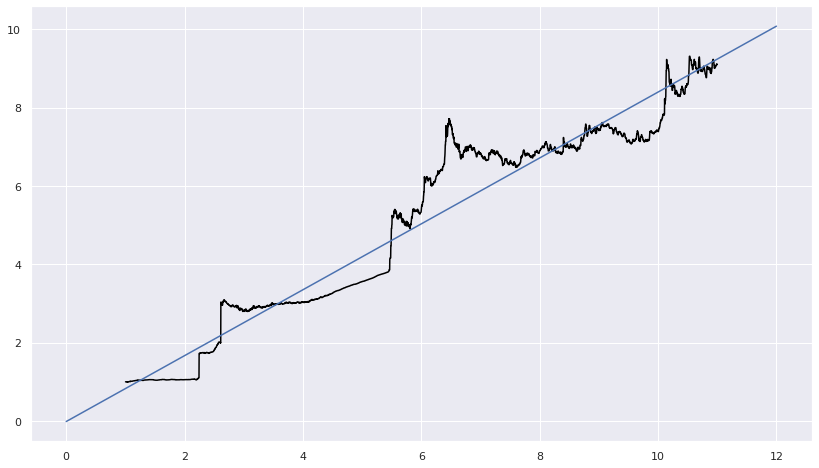

In [115]:
from sklearn.linear_model import LinearRegression
import math


Xaxis = usdByn['date_number'].values
Yaxis = usdByn['procent'].values

model = LinearRegression()
model.fit(Xaxis.reshape(-1, 1), Yaxis)

# Прорисовываем наш график
plt.figure(figsize=(14, 8))
plt.plot(Xaxis, Yaxis, c='black')

# Узнаем размеры нашего графика
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(math.floor(xlim[0]), math.ceil(xlim[1]))
yy = np.linspace(math.floor(ylim[0]), math.floor(ylim[1]))

# Рисуем предсказаную модель
y_predict = model.predict(xx.reshape(-1, 1))
plt.plot(xx, y_predict)


In [116]:
# usdByn['date_number'] = np.array([((i * 10 / all_days) + 1) for i in range(1, all_days + 1)])
from datetime import date


date_futer = date(2022, 1, 1)

all_days_for_futer = (date_futer - date(2010, 1, 1)).days
date_for_predict = (all_days_for_futer * 10 / all_days) + 1
print(model.predict(np.array([[date_for_predict]])) * usdByn.iloc[0]['price'])

[2.81737896]
